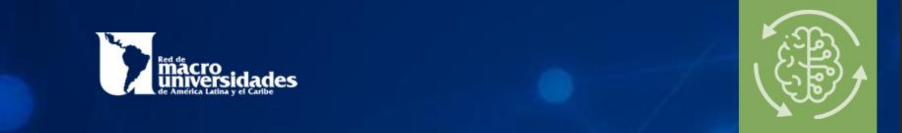

# **ESTADÍSTICA** - *LAB 1: Visualización y análisis de datos*
---

Israel Martinez




---
### Objetivo:
A través de este laboratorio pretendemos establecer buenas prácticas en el proceso de visualización y exploración de datos previos a la construcción de modelos predictivos. Utilizaremos para esto un *dataset* de un problema de aplicación concreto: predecir el precio de ventas de viviendas residenciales.

**Contenidos**:
  *   Visualización y descripción de variables según su tipo.
  *   Análisis de correlación de variables.
  *   Identificación de valores faltantes.
  *   Identificación de valores atípicos (outliers).
---

### *Setup*

In [ ]:
# Librerías que utilizaremos

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#!pip install plotly==5.3.1
import plotly.express as px                 # Librería que permite realizar visualizaciones interactivas
                                            # Algunas funciones usadas se encuentran en versiones más actuales: desde la  4.12.0
                                            # Si tiene una versión anterior, instalar: !pip install plotly==5.3.1
# Consultar versión de plotly instalada
#import plotly
# print(plotly.__version__)

## Descripción del *dataset*
La base de datos contiene información sobre atributos utilizados para tasar propiedades residenciales en la ciudad de Ames (Iowa).

- **Período**: 2006 - 2010
- **Cantidad de variables**: 82
- **Fuente**: Oficina de Tasación de inmuebles de Ames (Iowa)
- **Información adicional**
   -  Descripción del *dataset*: https://jse.amstat.org/v19n3/decock.pdf
   -  Desripción de las variables: [codebook](https://drive.google.com/file/d/1pDkSyI8UHtLEFdjpAVNmsVqB8N6a5Pqv/view?usp=sharing)

In [ ]:
# Leemos el dataset
path = 'https://raw.githubusercontent.com/pabort/MacroEntrenam2023Estadistica/main/AmesHousing.csv'
df = pd.read_csv(path)

In [ ]:
# Exploramos algunas observaciones al azar del dataset
df.sample(10)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
609,610,534402170,60,RL,NaN,8970,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,177500
430,431,528108140,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
88,89,532378110,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,127000
928,929,909425130,20,RL,90.0,13339,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,193000
1329,1330,903204095,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
2116,2117,906426195,60,RL,NaN,53107,Pave,NaN,IR2,Low,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
2596,2597,535376090,20,RL,90.0,5400,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,117000
2796,2797,907270050,60,RL,67.0,10566,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,268500
1310,1311,902301140,70,RM,34.0,4571,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,98000
1996,1997,902305010,70,RM,60.0,3600,Pave,Grvl,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Partial,124500


La función `info()` nos permite obtener información básica del *dataset*:

- Nombre de las variables
- Cantidad de observaciones no nulas
- Tipo de variable






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

*Notar que existen atributos en los que se pueden encontrar algunos (o muchos) **valores faltantes**. Dados por la diferencia entre la cantidad de entradas y la cantidad de valores ```non-null```*

Posibles criterios a tomar:

-  Imputación: completar los datos faltantes (pueden optarse por siluciones simples o más complejas).
-  Eliminar los atributos que se correspondan con un porcentaje suficientemente grande (más del 10%, 15%, 20%, 50%?)


Se pueden considerar distintas alternativas. En muchos casos suele ser factible usar técnicas simples de imputación de datos faltantes, como reemplazar los valores faltantes con los valores más frecuentes (moda), media o mediana. También pueden usarse criterios más complejos, como intentar inferir estos valores a través de algún modelo de clasificación (usarndo las otras variables para entrenar el modelo)

Además, podemos ver que hay distintos tipos de datos:
* int64: valores numéricos enteros
* float64: valores numéricos reales
* object: variables categóricas

In [ ]:
# Podemos resumir la cantidad de atributos o variables de cada tipo
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

Si observamos los valores de los distintos atributos numéricos en el *dataset* y leemos la descripción de las variables en el archivo *txt [codebook](https://drive.google.com/file/d/1pDkSyI8UHtLEFdjpAVNmsVqB8N6a5Pqv/view?usp=sharing), advertiremos que algunos de ellos hacen referencia a variables de tipos categóricas (ordnales o nominales). Por ejemplo:

- ```OverallQual``` es una escala en {1,...,10}.

- ```MSSubClass``` muestra códigos para alguna variable categórica. Podemos corroborar en detalle estas variables con la descripción del dataset.

Es necesario tener en cuenta estos aspectos para al análisis, tanto descriptivo como en la incorporación en los modelos que se estudiarán.

Podemos contar los valores faltantes (`missings`) de cada variable de la siguiente manera:

In [ ]:
missings = df.isna().sum()            # sumamos los missing de cada variable
missings[missings > 0].sort_values(ascending=False)  # filtramos nos los ordenamos para identificar aquellos con más valores faltantes

PoolQC          2917
MiscFeature     2824
Alley           2732
Fence           2358
FireplaceQu     1422
LotFrontage      490
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      83
BsmtFinType2      81
BsmtFinType1      80
BsmtQual          80
BsmtCond          80
MasVnrArea        23
MasVnrType        23
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

También podemos contar la cantidades de valores o categorías diferentes que asume cada variable del *dataset*, lo que denominamos `valores únicos`.

In [ ]:
# Creamos una lista que completaremos con los nombres de las variables y los valores únicos de cada una
count = []
for attribute in df.columns:
  count.append([attribute, len(df[attribute].unique())])

# convertimos la lista en un dataframe
unique = pd.DataFrame(count, columns=['attribute', 'nunique'])

# Configuración para mostrar el dataFrame completo
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Visualizamos el dataframe ordenando por la cantidad de valores únicos de cada atributo.
unique.sort_values(by='nunique')

,attribute,nunique
42,CentralAir,2
6,Street,2
51,HalfBath,3
66,PavedDrive,3
12,LandSlope,3
10,Utilities,3
7,Alley,3
49,BsmtHalfBath,4
53,KitchenAbvGr,4
9,LandContour,4


In [ ]:
# reseteo la configuración original (no es necesario, es solo para no mostrar toda la tabla.)
pd.reset_option("use_inf_as_na")

# Alternativamente a la forma anterior, podría haberse utilizado la función nunique()
df.nunique().sort_values()

CentralAir          2
Street              2
Alley               2
BsmtHalfBath        3
PavedDrive          3
HalfBath            3
GarageFinish        3
Utilities           3
LandSlope           3
KitchenAbvGr        4
Fence               4
ExterQual           4
PoolQC              4
LandContour         4
LotShape            4
BsmtExposure        4
BsmtFullBath        4
Electrical          5
MasVnrType          5
MiscFeature         5
BsmtQual            5
BsmtCond            5
ExterCond           5
Fireplaces          5
KitchenQual         5
HeatingQC           5
BldgType            5
FireplaceQu         5
LotConfig           5
YrSold              5
GarageQual          5
GarageCond          5
FullBath            5
GarageType          6
GarageCars          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
Foundation          6
RoofStyle           6
MSZoning            7
Condition2          8
HouseStyle          8
Functional          8
RoofMatl  

## **Exploración y visualización de datos**

A continuación realizamos un análisis descriptivo de las distintas variables que conforman el *dataset* atendiendo que, en una segunda etapa,  el objetivo será entrenar un modelo para predecir el precio de venta de viviendas.

Visualizar y calcular medidas descriptivas de los datos será importante para comprender las características de los datos que estamos analizando, poder encontrar relaciones entre las variables, obtener los primeros *insights* del problema y prever potenciales complicaciones o limitaciones.

### **Variable objetivo: precio de venta**

#### **Distribución**

En primer lugar, podemos ver la distribución de esta variable mediante un histograma. En este caso, utilizaremos la librería [seaborn](https://seaborn.pydata.org/examples/index.html).

<Axes: xlabel='SalePrice', ylabel='Count'>

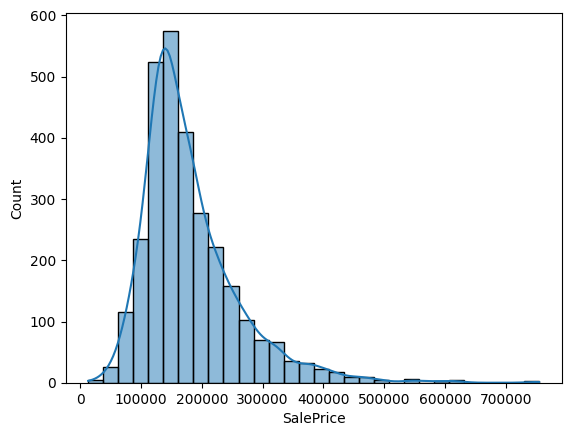

In [ ]:
sns.histplot(df['SalePrice'], bins=30, kde=True)

Mediante la función `describe()` podemos obtener estadísticas descriptivas básicas de esta variable cuantitativa:

- `count`: cantidad de obervacios
- `mean`: media
- `std`: desviación estándar
- `min`: valor mínimo
- `25%`: cuartil 1 (o percentil 25)
- `50%`: mediana, cuartil 2 (o percentil 50)
- `75%`: cuartil 3 (o percentil 75)
- `max`: valor máximo

In [ ]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Algunas de estas medidas descriptivas de posición, son utilizadas en las visualizaciones de `boxplot`.

<Axes: xlabel='SalePrice'>

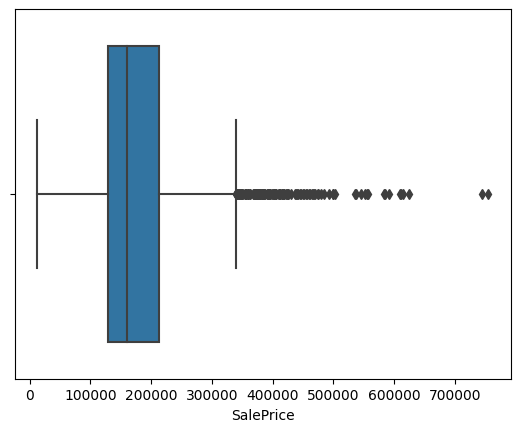

In [ ]:
#train_df.boxplot('SalePrice', vert=False)
sns.boxplot(x=df['SalePrice'])

A partir de esta descripción, ¿qué *insights* se desprenden en cuanto a la variable objetivo?:

- Dispersión:
- Simetría:
- Valores atípicos:

#### **Valores atípicos**

La identificación de valores atípicos mediante los boxplots surgen de considerar ciertos límites siguiendo algún criterio. Por ejemplo, se pueden establecer límites inferiores y superiores a partir de los cuáles se considera un dato como atípico considerando algún desv´io en relación al recorrido (o rango) intercuartílico

In [ ]:
# Cálculo de límites para identificar outliers

attribute = 'SalePrice'  # Puedes cambiar por el nombre del atributo o variable de interés

# Cuartiles
q1 = df[attribute].quantile(0.25)
q2 = df[attribute].quantile(0.5)
q3 = df[attribute].quantile(0.75)

# Rango intercuartílico
irq = q3 - q1

# Límites inferior y superior
lio = q1 - irq * 1.5
lso = q3 + irq * 1.5

print('Valores fuera del intervalo [{}, {}] son considerados anómalos'.format(lio, lso))

Valores fuera del intervalo [3500.0, 339500.0] son considerados anómalos


**Actividad**: Adicionalmente, puedes hacer un análisis univariado similar para otras variables cuantitativas del *dataset*.

### **Visualización de variables categóricas**

#### Tabla de frecuencias

In [ ]:
# Ver ayuda de la función https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# Probar con otras variables categóricas

# Código de variables ExterQual
# Ex Excelente
# Gd Bueno
# TA Medio/Típico
# Fa Regular
# Po Pobre

df['ExterQual'].value_counts()   # Frecuencias absolutas

TA    1799
Gd     989
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [ ]:
df['ExterQual'].value_counts(normalize=True)*100   # Frecuencias relativas (en porcentaje)

TA    61.399317
Gd    33.754266
Ex     3.651877
Fa     1.194539
Name: ExterQual, dtype: float64

#### Gráficos de barras

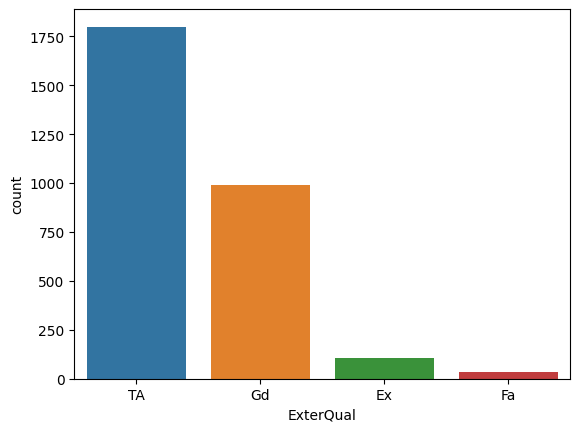

In [ ]:
# Ver ayuda de la función https://seaborn.pydata.org/generated/seaborn.barplot.html
# Probar con otras variables categóricas

# Código de variables ExterQual
# Ex Excelente
# Gd Bueno
# TA Medio/Típico
# Fa Regular
# Po Pobre

sns.countplot(x = df.ExterQual)
plt.show()

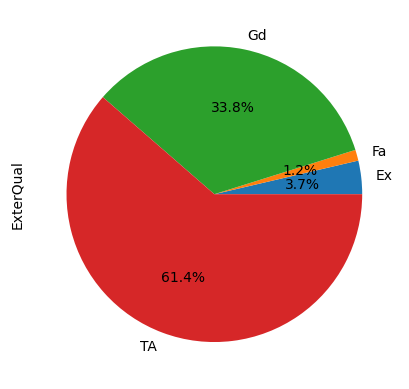

In [ ]:
# Gráfico de torta
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

tabla = df.groupby("ExterQual")["ExterQual"].count()
tabla.plot.pie(autopct="%.1f%%");

### **Correlación**

A continuación analizaremos la correlación de la variable objetivo con algunos de los atributos para comenzar a obtener *insights* relacionadas a las variables a considerar en el o los modelos.
Claramente, para esto debemos atender al tipo de variable que estamos considerando.

#### **Precios versus variables categóricas**

La variable calidad externa (`ExterQual`) refiere a la calidad del material del exterior, por lo que es una variable cualitativa (aunque ordinal).
Una alternativa para analizar la relación entre el precio de las viviendas y entre esta variable categórica (ordinal en este caso, pero para cualquiera en general) es mediante `boxplots` para cada nivel o categoría de la variable categórica, tal como se muestra a continuación:


<Axes: xlabel='ExterQual', ylabel='SalePrice'>

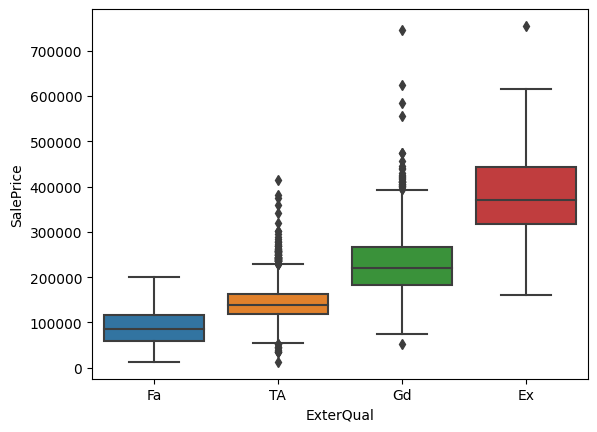

In [46]:
sns.boxplot(x='ExterQual', y="SalePrice", order=["Fa","TA","Gd","Ex"], data=df)

Por ejemplo, de esta visualización visualización se desprende que hay una relación positiva entre la calidad de los materiales externos y el precio de las viviendas (observando las medianas, por ejemplo). Además, la dispersión de precios crece a medida que es mayor la calidad (observando el rango o rnago intercuartílico, observando la extensión del los diferentes boxplots)

De la misma el índice de calidad global (`OverallQual`) valora el material y el acabado general de la vivienda, por lo que también podría analizarse de manera similar.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

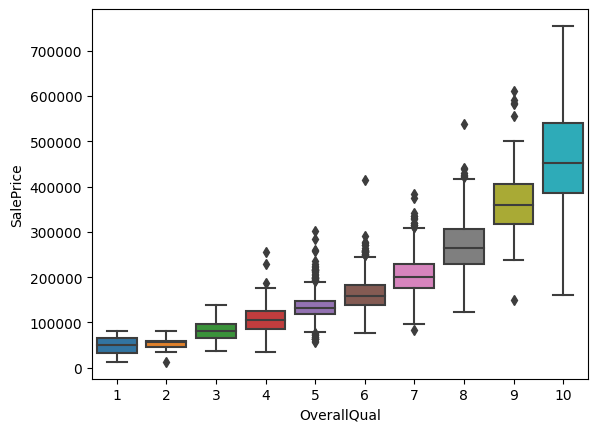

In [47]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df)

**Observación**: Se puede programar y realizar ultiples gráficos de este tipo, consierando diferentes atributos, indicando las variables de interés. Una forma es la siguiente:

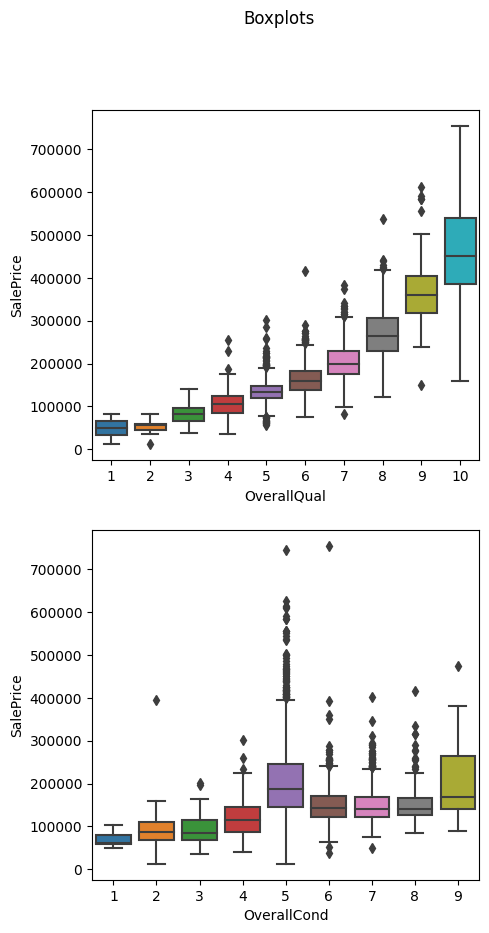

In [ ]:
attributes = ['OverallQual', 'OverallCond']  # se pueden incorporar más atributos o variables categóricas

num_rows = len(attributes) # cantidad de gráficos a realizar (uno por cada atributo, que será dispuesto como subgráfico por filas).
size = (5,10)             # Tamaño del gráfico completo (donde se mostrarán los subgráficos)

fig, axes = plt.subplots(num_rows, 1, figsize=size)
fig.suptitle('Boxplots')

for idx, attribute in enumerate(attributes):
  sns.boxplot(ax=axes[idx], x=attribute, y="SalePrice", data=df)

#### **Precios versus variables cuantitativas**

Una manera gráfica de analizar la relación entre variables cuantitativas es mediante diagramas de dispersión. En la siguiente visualización, por ejemplo, se aprecia una relación positiva entre el precio de las viviendas (`SalePrice`) y la superficie habitable o construida (`GrLivArea`) y superficie de sótanos (`TotalBsmtSF`).

**Actividad**: Pruebe incorporando otros atributos y analizar no solo la relación con el precio de venta, sino entre ellos.

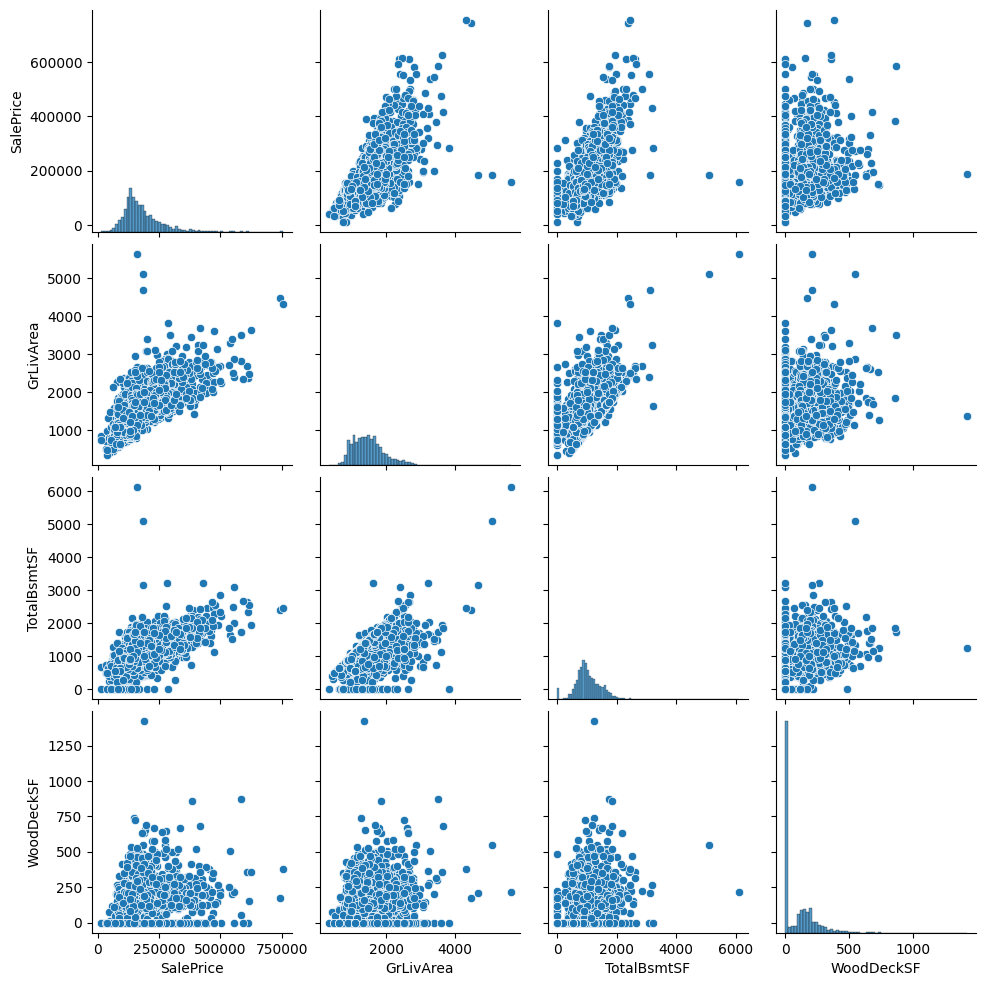

In [ ]:
columns = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'WoodDeckSF']
sns.pairplot(df[columns])

**Coeficientes de correlación**. Esta medidas nos permite medir la correlación lineal entre las variables numéricas. El signo inicará el sentido de la relación, mientras que cuanto más cercano a 1 (en valor absoluto) indica que esta correlación es relativamente más intensa.

Esto lo podemos obtener con la función [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). Como podemos ver, la relación entre el precio de venta y el área habitable es relativamente más intensa que con la superficie de sótanos.

In [ ]:
columns = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'WoodDeckSF']
df[columns].corr()

,SalePrice,GrLivArea,TotalBsmtSF,WoodDeckSF
SalePrice,1.000000,0.706780,0.632280,0.327143
GrLivArea,0.706780,1.000000,0.444675,0.250153
TotalBsmtSF,0.632280,0.444675,1.000000,0.229931
WoodDeckSF,0.327143,0.250153,0.229931,1.000000


**Heatmap**. Una forma de visualizar gráficamente los coeficientes de correlación de múltiples variables (y poqr qué no todas las variables númericas) es mediante la función [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de `Seaborn`. A continuación se presenta el heatmap de todas las variables de la base de datos(^1)

---
(^1) Por defecto, la función toma todas las variables numéricas del *dataset*. Como actividad, realice la adecuación necesaria para tomar solo las variables de interés y del tipoque sean adecuadas.

<ipython-input-17-225f326971a4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=256),


<Axes: >

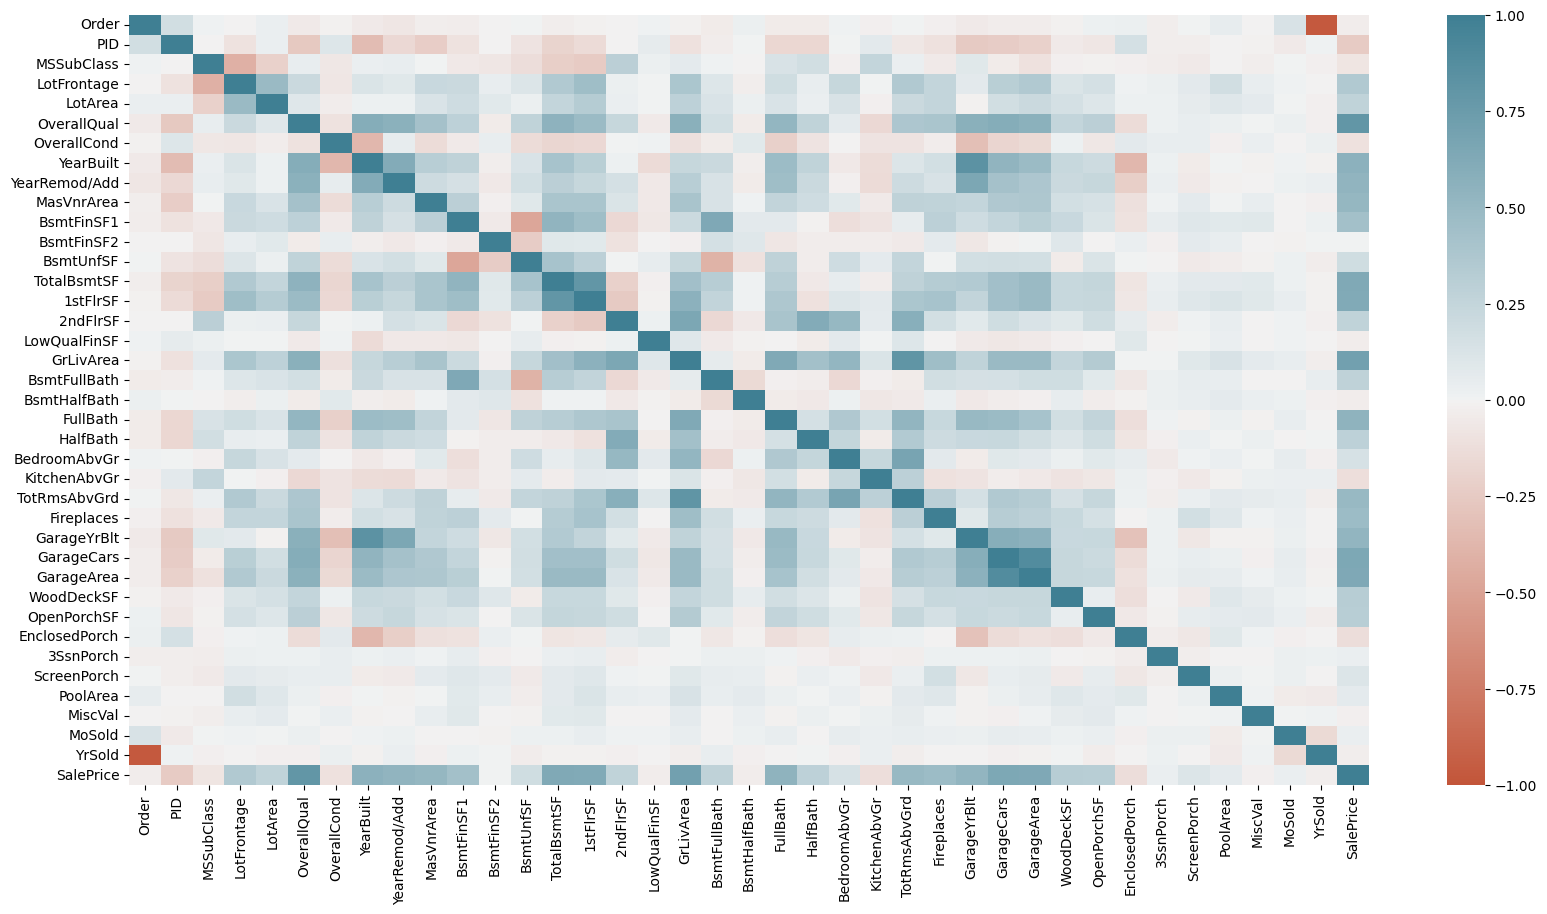

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))

# se puede configurar diferentes paletas de colores con la variable <cmap>:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# Por ejemplo, se puede cambiar cmap='crest'
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=256),
            vmin=-1, vmax=1, center=0)

A continuación se utiliza el argumento `vmin` de la función `heatmap()` para mostrar solamente las correlación mayor o iguales a 0.65.

<ipython-input-29-ddbc3ecb36eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=0.65, vmax=1., cmap='rocket')


<Axes: >

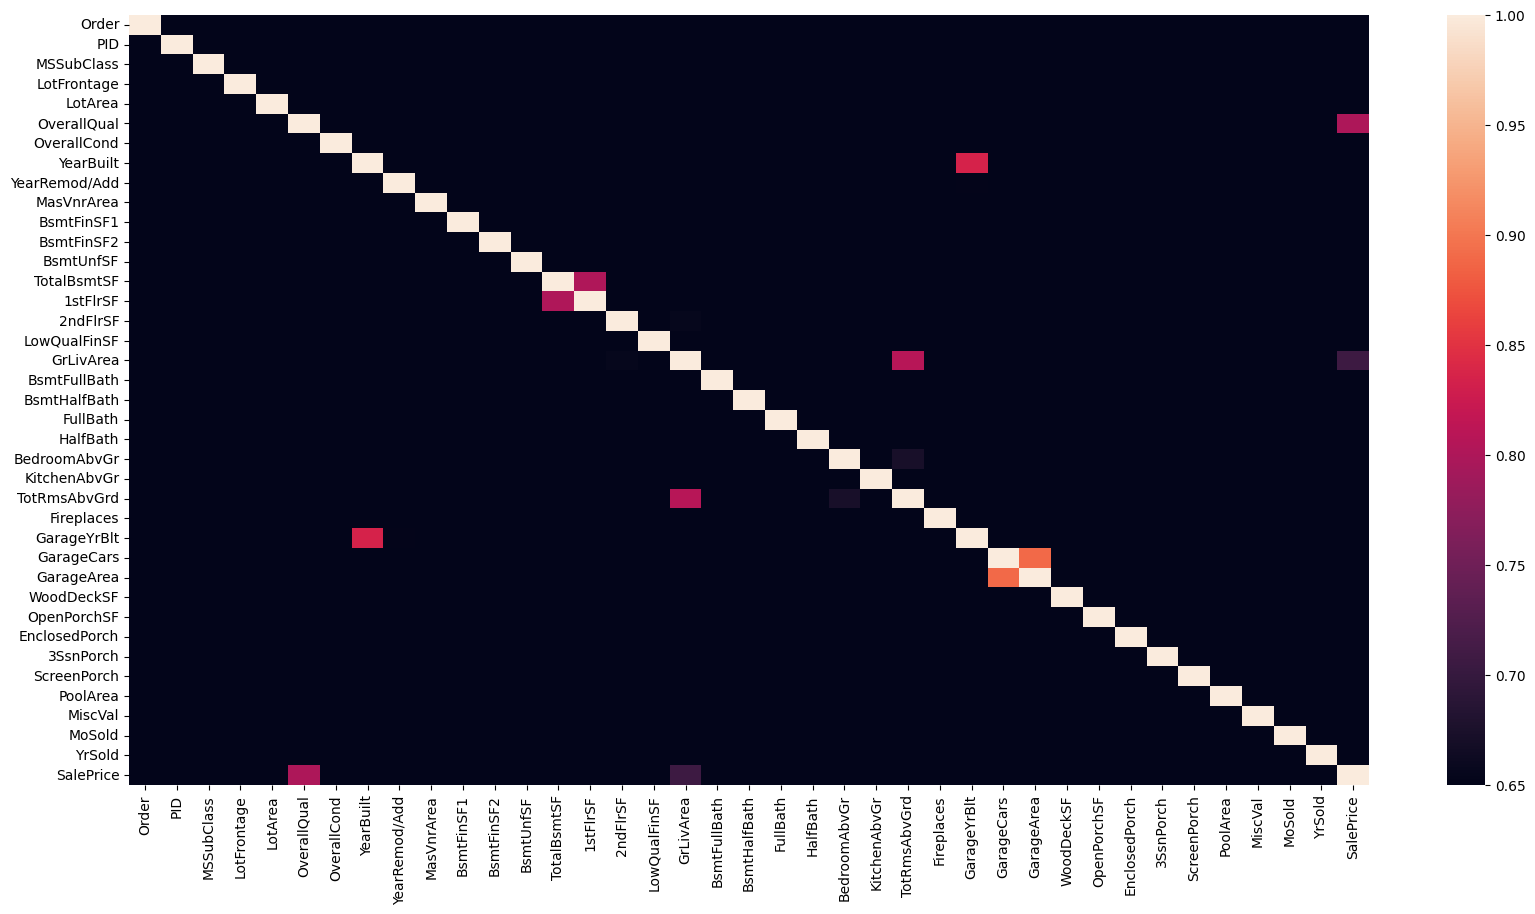

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmin=0.65, vmax=1., cmap='rocket')

**NOTA** La función ```corr()``` solo tiene en cuenta las variables numéricas pero tenemos casos de variables numéricas nominales (no ordinales).

Lo correcto sería hacer el mapa de correlación filtrando las variables que correspondan ¿Cómo lo podemos hacer?

In [ ]:
# Completar acá.

## Visualización con Plotly

[Plotly](https://plotly.com/python/) es una librería que permite realizar de manera sencilla visualizaciones interactivas (también disponible para R, Julia y Matlab). Existen dos módulos:

*   *Plotly Express (plotly.express)*. Importado usualmente *px*. Tiene las funciones más simples y versátiles.
*   *Graph Objects (plotly.graph_objects)*. Importado usualmente *go*. Permite incrementar sustancialmente al complejidad de las visualizaciones. Se pueden realizar los mismo plots que *Plotly Express*, pero en general con una mayor cantidad de líneas.

**Variable de interés**: Precio de la propiedad (Dólares)


In [ ]:
fig = px.box(df, x="SalePrice")
fig.show()

Plotly también permite generar gráficos complementarios en los márgenes. Por ejemplo un histograma junto a un box plot

In [ ]:
fig = px.histogram(df, x="SalePrice",
                   marginal="box",                             # puede usarse alternativamente 'box', 'rug' o 'violin'
                   title = 'Distribución del precio de ventas',
                   labels={'SalePrice':'Precio de venta'},
                   hover_data=['Order'],
                   histnorm = 'percent')
fig.update_yaxes(title_text='Frecuencia')
fig.show()

Estos gráficos puede guardarse en formato *html* o incorporarse en dahsboards, por ejemplo.


In [ ]:
import plotly.graph_objects as go
from google.colab import files

go.Figure.write_html(fig,"plot.html")  # generar un html or imagen
files.download("plot.html")            # decargar el achivo generado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Esta librería también permite realizar gráficos de dispersión (`scatterplots`) combinadas con boxplots. gráficos de violín, u otros que permiten analizar la distrbución univarida de cada una de las variables que se pretenden estudiar.

In [ ]:
fig = px.scatter(
    df, x='GrLivArea', y='SalePrice', opacity=0.65,
    trendline='ols', trendline_color_override='red',
    marginal_x='box',
    marginal_y='violin',
    hover_data=['Order', 'LotArea'],
    title = 'Relación entre el precio de venta y la superficie cubierta de las propiedades'
)
fig.update_traces(marker_size=10, marker_color= 'rgba(255, 182, 193, .9)')
fig.show()

En la visualización anterior, sse observa que a medida que es mayor el la superfcie fubierta, la dispersión del precio de venta es mayor. Una trasnformación que permite tratar este tipo de problemas es tomar logartimo de la variable.

In [ ]:
# Cramos una nueva variable: logaritmo del precio de venta
df['logSalePrice'] = np.log(df['SalePrice'])

fig = px.scatter(
    df, x='GrLivArea', y='logSalePrice', opacity=0.65,
    trendline='ols', trendline_color_override='red',
    marginal_x='box',
    marginal_y='violin',
    hover_data=['Order', 'LotArea'],
    title = 'Relación entre el precio de venta y la superficie cubierta de las propiedades'
)
fig.update_traces(marker_size=10, marker_color= 'rgba(255, 182, 193, .9)')
fig.show()

## Otras librerías de utilidad

Si bien a lo largo de las aplicaciones de IA que relicemos no abordaremos en detalle, en el análisis exploratorio podemos analizar medidas estadísticas resumen tanto univariado como bivariado. Existen librerías con funciones Estadísticas Matemáticas con medidas que pueden resultar de interés, como [statistics](https://docs.python.org/es/3/library/statistics.html)